# (연습) 연속 확률 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 연속 균등 분포

`np.random.uniform()` 함수를 한 번 적용해서 생성된 실수들의 분포는 균등하지 않아 보인다.
하지만 현실에서의 균등 분포를 적절하게 반영한다.
예를 들어 동전을 10번 던졌을 때 반드시 5번씩 앞면, 뒷면이 나오지 않으며
주사위를 6번 던져도 바드시 1번씩 각각의 번호가 나오지는 않는다.

In [13]:
np.random.seed(17)
uni1000 = np.random.uniform(2, 5,1000)

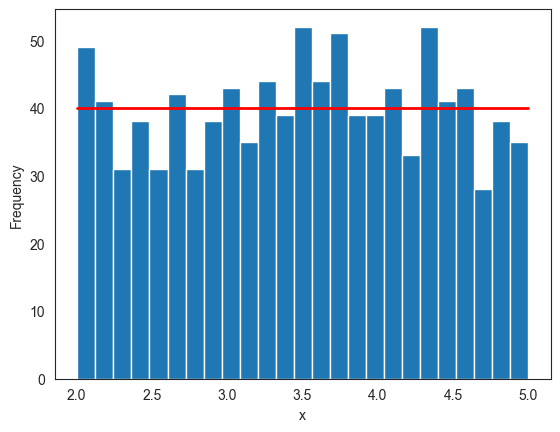

In [14]:
fig, ax = plt.subplots()

freqs, bins, _ = ax.hist(uni1000, bins=25)

# 평균 도수: freqs.mean() = 40.0
ax.plot(bins, np.ones_like(bins) * freqs.mean(), linewidth=2, color='r')

ax.set_xlabel('x')
ax.set_ylabel('Frequency')

plt.show()

하지만 동전 던지기 횟수를 1만번, 10만번 등 키우면 거의 50대 50의 확률로 앞면, 뒷면이 나오고,
동전 던지기 횟루를 6만번, 60만번 으로 늘리면 거의 1/6의 확률로 각각의 숫자가 나온다.
이처럼 시행횟수를 늘렸을 때 이론적인 확률값에 수렴하는 현상을 
**큰 수의 법칙**<font size='2'>law of large numbers</font>이라 부른다.

**문제 1**

`np.random.uniform()` 함수를 1만번 실행했을 때 균등하게 등분된 구간별 상대도수의 평균값이 일정함을 보이는 모의실험 코드를 구현하라.

힌트:

1. `seed`값을 0부터 9,999까지 변경하면서 아래 내용을 1만 번 반복 실행한다.
    - 구간 $[2, 5]$에서 1,000개의 부동소수점을 균등 분포를 이용하여 선택한다.
    - 25개로 등분된 구간별 상대도수 분포를 계산한다.
    - 구간별 상대도수의 누적합을 계산한다.

2. 최종적으로 구간별 상대도수의 평균값을 계산한다.

답:

구간별 확률 밀도 함수값의 평균값을 계산한다.

In [10]:
iter_num = 10000    # 반복 횟수
bins = 25           # 구간 개수
sample_size = 1000  # 표본 크기

# 구간별 확룰 밀도 함수값의 합 저장용
dens_sum = np.zeros(bins)

# iter_num 횟수만큼 표본 선택 실험 반복
for i in range(iter_num):
    np.random.seed(i) # 시드 다르게 지정
    
    uni1000 = np.random.uniform(2, 5,sample_size)
    dens, bins = np.histogram(uni1000, bins=bins, density=True) # 히스토그램 데이터 생성
    dens_sum += dens # 구간별 누적 확률 밀도 함숫값

# 구간별 평균 확률 밀도 함숫값    
dens_mean = dens_sum / iter_num

아래 코드는
계산된 구간별 확률 밀도 함숫값을 검정 실선 그래프로 그린다.
결과적으로 빨간 직선으로 그려진 $y = 1/3$의 그래프와 거의 유사하다.

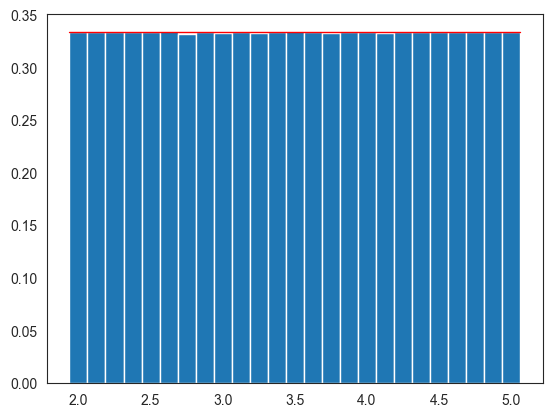

In [11]:
fig, ax = plt.subplots()

# 빨간 직선: y=1/3 그래프
ax.plot(np.arange(-0.5, len(dens_mean)+0.5), np.ones_like(bins) * 1/3, linewidth=1, color='r')

# 막대그래프: 구간별 평균 확률 밀도
ax.bar(range(0, len(dens_mean)), dens_mean, width=1)

ax.set_xticks(np.arange(0, 26, 4))
ax.set_xticklabels(np.arange(2.0, 5.1, 0.5))

plt.show()

## 붓꽃 데이터셋

[2차원 데이터 시각화](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-twoD_visualization.ipynb)에서 다뤘던 붓꽃 데이터셋을 활용하여
확률 밀도 함수와 누적 분포 함수의 관계를 살펴 본다.

먼저 붓꽃 데이터셋을 기본 저장소에서 불러온다.

In [18]:
iris = pd.read_csv(data_url+"iris.csv")

총 150개의 샘플이 각각 다섯 개의 특성을 갖는다.

| 특성 | 의미 |
| :--- | :--- |
| sepal.length | 꽃받침 길이 |
| sepal.width | 꽃받침 너비 |
| petal.length | 꽃잎 길이 |
| petal.width | 꽃잎 길이 |
| variety | 품종 |

In [19]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


여기서는 꽃잎의 길이 정보 `petal.length`만 활용한다.

In [ ]:
iris = iris['petal.length']

**문제 2**